# Iris Classification

## EDA Notebook

This notebook uses the training data to conduct exploratory data analysis (EDA).

**NOTE:** To avoid data leakage, EDA and training should not use test data.

In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
data_path = os.path.join('..', 'data')

In [3]:
X_train_data_path = os.path.join(data_path, 'X_train.csv')

In [4]:
y_train_data_path = os.path.join(data_path, 'y_train.csv')

In [5]:
X_train = pd.read_csv(X_train_data_path)
y_train = pd.read_csv(y_train_data_path)

In [6]:
df = pd.concat([X_train, y_train], axis=1)

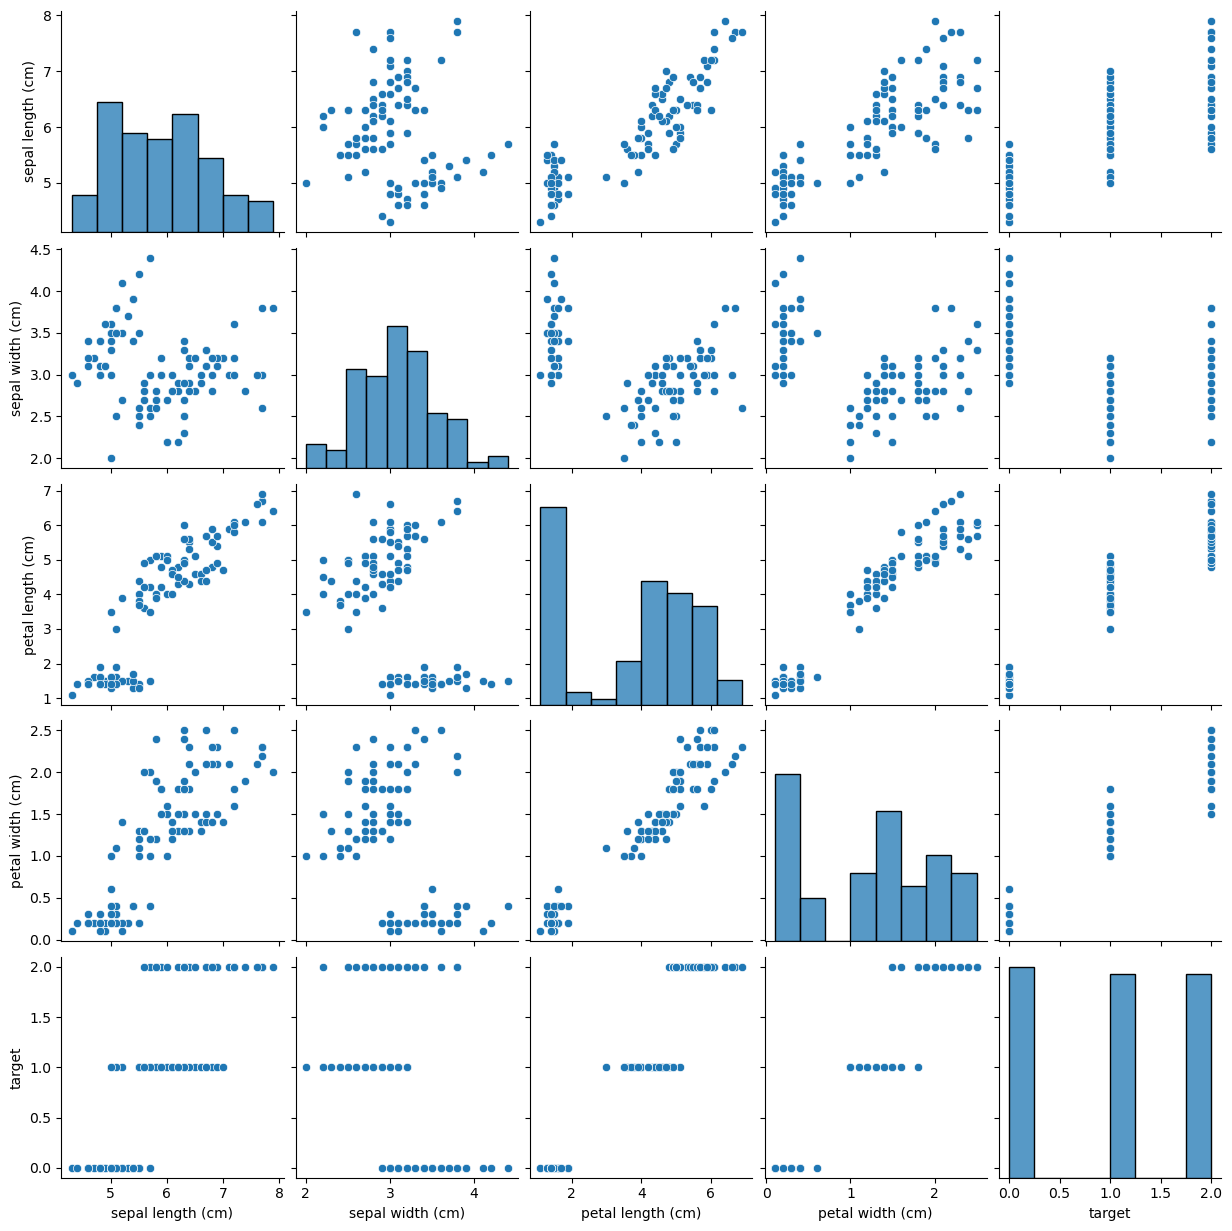

In [7]:
sns.pairplot(df)

In [8]:
def df_describe(df, columns=None):
    cols = columns or df.columns
    for col in cols:
        print(f'Column name: {col}')
        print('\n')
        print(f'Column unique values: \n{df[col].nunique()}')
        print('\n')  
        print(f'Column values: \n{df[col].value_counts()}')
        print('\n')  

In [9]:
df_describe(df)

Column name: sepal length (cm)


Column unique values: 
33


Column values: 
sepal length (cm)
6.3    7
5.0    7
5.5    6
5.1    6
5.8    5
4.8    5
5.7    4
6.4    4
6.7    4
7.2    3
5.4    3
5.6    3
6.8    3
7.7    3
6.2    3
6.9    3
5.2    3
6.1    3
5.9    3
6.0    3
4.9    3
4.6    3
6.6    2
6.5    2
7.4    1
7.6    1
7.9    1
4.4    1
4.7    1
4.3    1
5.3    1
7.1    1
7.0    1
Name: count, dtype: int64


Column name: sepal width (cm)


Column unique values: 
22


Column values: 
sepal width (cm)
3.0    14
3.2     9
3.1     9
2.8     9
2.7     7
3.4     6
2.9     6
3.5     6
3.8     5
2.5     5
3.3     4
2.6     4
3.6     3
2.2     3
2.4     2
3.9     2
3.7     1
4.2     1
4.4     1
4.1     1
2.3     1
2.0     1
Name: count, dtype: int64


Column name: petal length (cm)


Column unique values: 
37


Column values: 
petal length (cm)
1.4    11
1.5     9
1.6     7
5.1     6
4.4     4
4.9     4
4.0     4
5.6     3
4.2     3
4.7     3
1.3     3
5.0     3
5.7     3
6.1     3
4.8 